# Extra Credit: Building regularized models for Boston data set

## Linear regression

In [55]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# Loading boston data
bdata = load_boston()

X = bdata.data
y = bdata.target

X_norm,mu,sigma = utils.feature_normalize(X)
XX = np.vstack([np.ones((X.shape[0],)),X_norm.T]).T
XX, XXtest, y, ytest = train_test_split(XX, y, test_size=0.2)
XX, XXval, y, yval = train_test_split(XX, y, test_size=0.2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The lowest achievable test error is ~$12.7$ calculated by the next cell. If we compare the predicted price and the actual price in the test set, we can see that the model somehow predicts the price correctly.

Optimization terminated successfully.
         Current function value: 10.346288
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
The test error is  12.704822887


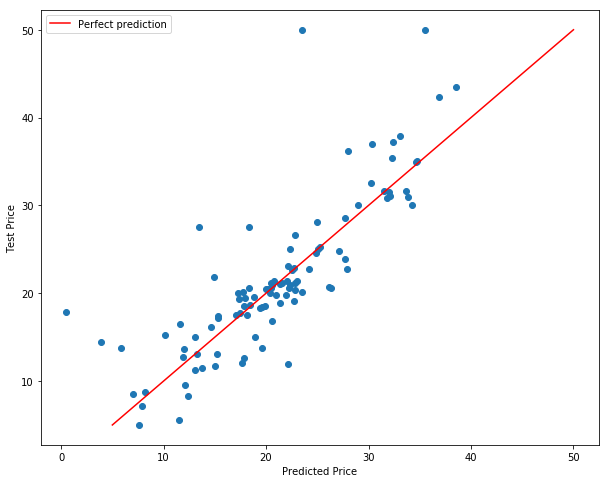

In [57]:
reg = 0.0
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_best = reglinear_reg.train(XX,y,reg=reg,num_iters=10000)
print 'The test error is ', RegularizedLinearReg_SquaredLoss().loss(theta_best, XXtest,ytest,0.0)

ypredict = reglinear_reg.predict(XXtest)
plt.scatter(ypredict,ytest)
plt.xlabel('Predicted Price')
plt.ylabel('Test Price')
plt.plot([5,50],[5,50],color='red')
plt.legend(['Perfect prediction'])
plt.show()

## Select $\lambda$ in a linear regression model
Even if we change the $\lambda$ dramatically, we didn't see significant improvments in the train/validation error, which means the linear regression itself cannot fully explain the data.

Optimization terminated successfully.
         Current function value: 10.346288
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.346367
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.346523
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.347070
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.348633
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 10.354091
         Iterations: 25
         Function evaluations:

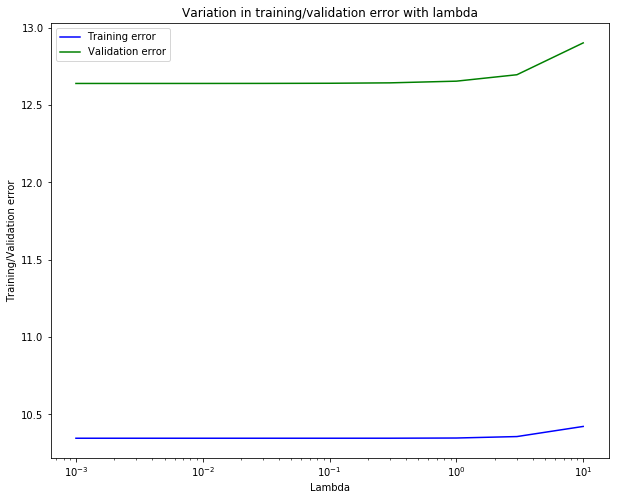

In [58]:
reg_vec, error_train, error_val = utils.validation_curve(XX,y,XXval,yval)
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()


## Adding polynomial features 
### Quadratic features - No cross term
We can add polynomial features such as $X_i^2, X_i^3, ..$ to the original dataset. Here, we didn't include any cross term like $X_1X_2$

         Current function value: 8.000462
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 8.002022
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 8.005127
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 8.015858
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 8.045422
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 8.138979
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
         Current function value: 8.357270
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101
Optimization terminated successfully.
   

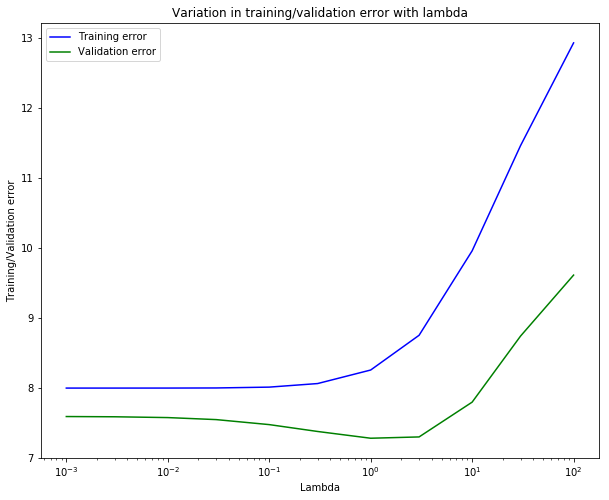

In [69]:
# Loading boston data
bdata = load_boston()
X = bdata.data
y = bdata.target

X_poly = np.vstack([X.T,(X**2).T]).T

X_poly_norm,mu,sigma = utils.feature_normalize(X_poly)

XX_poly = np.vstack([np.ones((X_poly_norm.shape[0],)),X_poly_norm.T]).T
XX_poly, XX_poly_test, y, ytest = train_test_split(XX_poly, y, test_size=0.2,random_state=2)
XX_poly, XX_poly_val, y, yval = train_test_split(XX_poly, y, test_size=0.2,random_state=2)

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval,reg_vec=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10,30,100])
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()

The best $\lambda$ should be $3.0$. Applying it on the test data, we have the test error as $5.64$, which is better than the simple linear model.

Optimization terminated successfully.
         Current function value: 9.846392
         Iterations: 61
         Function evaluations: 62
         Gradient evaluations: 62
The test error is  5.64624492774


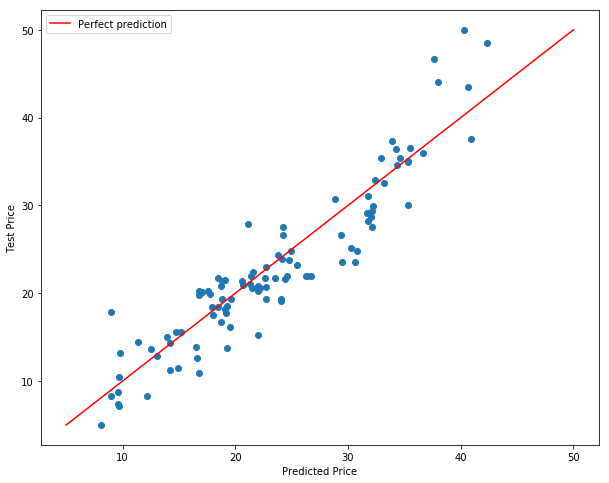

In [72]:
reg = 3.0
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_best = reglinear_reg.train(XX_poly,y,reg=reg,num_iters=10000)
print 'The test error is ', RegularizedLinearReg_SquaredLoss().loss(theta_best, XX_poly_test,ytest,0.0)

ypredict = reglinear_reg.predict(XX_poly_test)
plt.scatter(ypredict,ytest)
plt.xlabel('Predicted Price')
plt.ylabel('Test Price')
plt.plot([5,50],[5,50],color='red')
plt.legend(['Perfect prediction'])
plt.show()

### Quadratic features -- with cross terms
We can also include the cross terms into our model:

         Current function value: 3.101367
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.106763
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.117439
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.153638
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.248172
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.505398
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 3.945700
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104
         Current function value: 4.650696

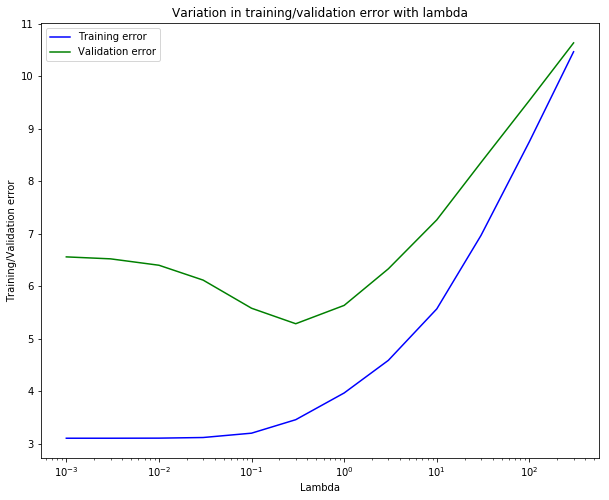

In [73]:
# Loading boston data
bdata = load_boston()
X = bdata.data
y = bdata.target

poly = sklearn.preprocessing.PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)

X_poly_norm,mu,sigma = utils.feature_normalize(X_poly)

XX_poly = np.vstack([np.ones((X_poly_norm.shape[0],)),X_poly_norm.T]).T
XX_poly, XX_poly_test, y, ytest = train_test_split(XX_poly, y, test_size=0.2, random_state=1)
XX_poly, XX_poly_val, y, yval = train_test_split(XX_poly, y, test_size=0.2, random_state=1)

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval,reg_vec=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10,30,100,300])
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()

The best $\lambda$ is still 3.0, but we have a smaller test error as $4.62$.

Optimization terminated successfully.
         Current function value: 5.539294
         Iterations: 91
         Function evaluations: 95
         Gradient evaluations: 95
The test error is  4.62920014468


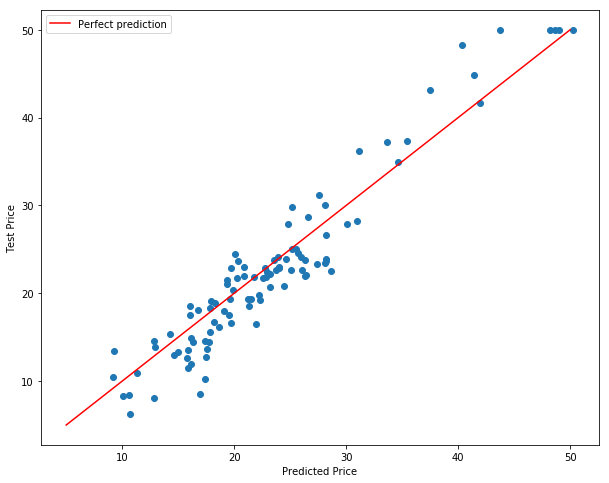

In [75]:
reg = 3.0
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_best = reglinear_reg.train(XX_poly,y,reg=reg,num_iters=10000)
print 'The test error is ', RegularizedLinearReg_SquaredLoss().loss(theta_best, XX_poly_test,ytest,0.0)

ypredict = reglinear_reg.predict(XX_poly_test)
plt.scatter(ypredict,ytest)
plt.xlabel('Predicted Price')
plt.ylabel('Test Price')
plt.plot([5,50],[5,50],color='red')
plt.legend(['Perfect prediction'])
plt.show()

### Cubic features -- no cross terms
Similarly, we can add $X^3$ features here.

         Current function value: 7.072551
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 7.077338
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 7.086758
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 7.118343
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 7.198211
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 7.400725
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
         Current function value: 7.715160
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103
Optimization terminated successfully.
   

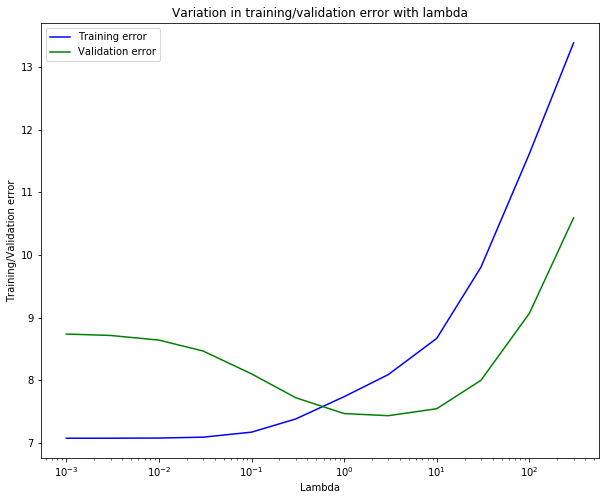

In [77]:
# Loading boston data
bdata = load_boston()
X = bdata.data
y = bdata.target

X_poly = np.vstack([X.T,(X**2).T,(X**3).T]).T

X_poly_norm,mu,sigma = utils.feature_normalize(X_poly)

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly_norm.T]).T
XX_poly, XX_poly_test, y, ytest = train_test_split(XX_poly, y, test_size=0.2, random_state=1)
XX_poly, XX_poly_val, y, yval = train_test_split(XX_poly, y, test_size=0.2, random_state=1)

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval,reg_vec=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10,30,100,300])
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()

We will use $\lambda=3$ as the regularization factor, and the best test error is $7.6$.

Optimization terminated successfully.
         Current function value: 8.765517
         Iterations: 73
         Function evaluations: 76
         Gradient evaluations: 76
The test error is  7.6044920179


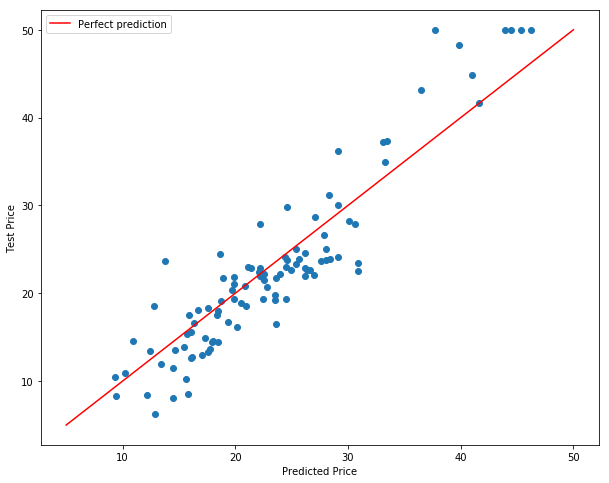

In [78]:
reg = 3.0
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_best = reglinear_reg.train(XX_poly,y,reg=reg,num_iters=10000)
print 'The test error is ', RegularizedLinearReg_SquaredLoss().loss(theta_best, XX_poly_test,ytest,0.0)

ypredict = reglinear_reg.predict(XX_poly_test)
plt.scatter(ypredict,ytest)
plt.xlabel('Predicted Price')
plt.ylabel('Test Price')
plt.plot([5,50],[5,50],color='red')
plt.legend(['Perfect prediction'])
plt.show()

### Cubic features -- with cross terms
We can also include the cross terms like $X_1X_2^2$ into our model.

         Current function value: 1.164739
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 1.169399
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 1.178620
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 1.209885
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 1.291568
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 1.514536
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 1.901728
         Iterations: 100
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 2.536925

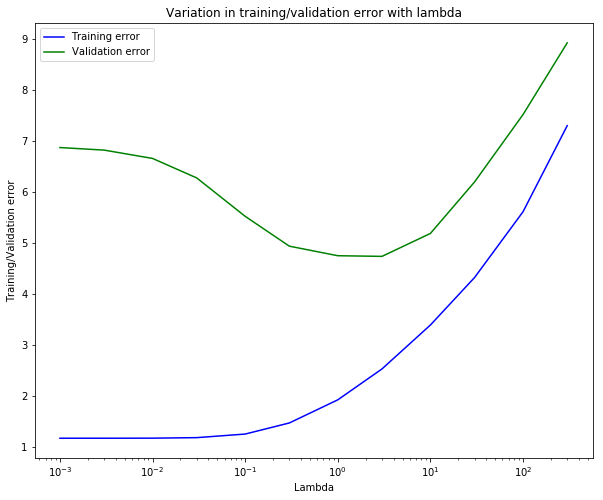

In [79]:
# Loading boston data
bdata = load_boston()
X = bdata.data
y = bdata.target

poly = sklearn.preprocessing.PolynomialFeatures(degree=3,include_bias=False)
X_poly = poly.fit_transform(X)

X_poly_norm,mu,sigma = utils.feature_normalize(X_poly)

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly_norm.T]).T
XX_poly, XX_poly_test, y, ytest = train_test_split(XX_poly, y, test_size=0.2, random_state=1)
XX_poly, XX_poly_val, y, yval = train_test_split(XX_poly, y, test_size=0.2, random_state=1)

reg_vec, error_train, error_val = utils.validation_curve(XX_poly,y,XX_poly_val,yval,reg_vec=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10,30,100,300])
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()

For this model, we will use $\lambda=1$, and it gives us the smallest test error so far ~$3.2$.

Optimization terminated successfully.
         Current function value: 2.536894
         Iterations: 148
         Function evaluations: 157
         Gradient evaluations: 157
The test error is  3.21788377518


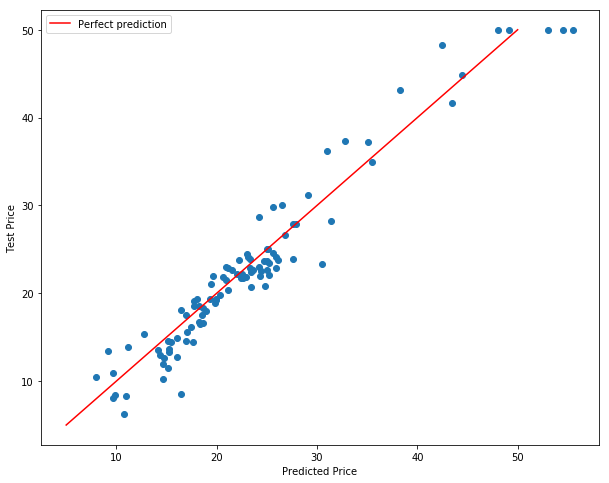

In [81]:
reg = 1.0
reglinear_reg = RegularizedLinearReg_SquaredLoss()
theta_best = reglinear_reg.train(XX_poly,y,reg=reg,num_iters=10000)
print 'The test error is ', RegularizedLinearReg_SquaredLoss().loss(theta_best, XX_poly_test,ytest,0.0)

ypredict = reglinear_reg.predict(XX_poly_test)
plt.scatter(ypredict,ytest)
plt.xlabel('Predicted Price')
plt.ylabel('Test Price')
plt.plot([5,50],[5,50],color='red')
plt.legend(['Perfect prediction'])
plt.show()

## Summary
In general, we should use an approriate $\lambda$ in linear regression models. If $\lambda$ is too small, the variance will be large as well as the validation error. In this case, the corresponding model is not useful. For large $\lambda$, the validation error is also large as well as the training error, leading to useless models.